In [1]:
# Step 1: Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Step 2: Load the dataset
df = pd.read_csv("C:\\Users\\HP\\Downloads\\earthquake_alert_balanced_dataset.csv")

# Step 3: Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 4: Inspect the dataset
print("First 5 rows:\n", df.head())
print("\nDataset Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())
print("\nAlert Class Distribution:\n", df['alert'].value_counts())

# Step 5: Drop duplicates and missing values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Step 6: Convert numeric columns
numeric_cols = ['magnitude', 'depth', 'cdi', 'mmi', 'sig']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Step 7: Encode categorical target
label_encoder = LabelEncoder()
df['alert_encoded'] = label_encoder.fit_transform(df['alert'])

# Step 8: Scale numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numeric_cols])
scaled_df = pd.DataFrame(scaled_features, columns=numeric_cols)

# Step 9: Combine scaled features with encoded target
df_processed = pd.concat([scaled_df, df['alert_encoded']], axis=1)

# Step 10: Train-test split
X = df_processed[numeric_cols]
y = df_processed['alert_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 11: Output shapes
print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

First 5 rows:
    magnitude  depth  cdi  mmi  sig  alert
0        7.0     14    8    7    0  green
1        6.9     25    4    4  -33  green
2        7.0    579    3    3  -13  green
3        7.3     37    5    5   65  green
4        6.6    624    0    2  -98  green

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1300 non-null   float64
 1   depth      1300 non-null   int64  
 2   cdi        1300 non-null   int64  
 3   mmi        1300 non-null   int64  
 4   sig        1300 non-null   int64  
 5   alert      1300 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 61.1+ KB

Summary Statistics:
         magnitude        depth          cdi          mmi          sig
count  1300.000000  1300.000000  1300.000000  1300.000000  1300.000000
mean      7.061008    50.321538     6.976154     6.939231    -9.74

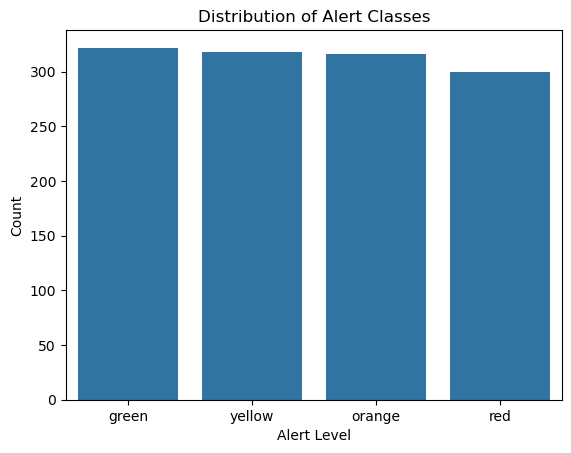

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='alert', data=df)
plt.title('Distribution of Alert Classes')
plt.xlabel('Alert Level')
plt.ylabel('Count')
plt.show()

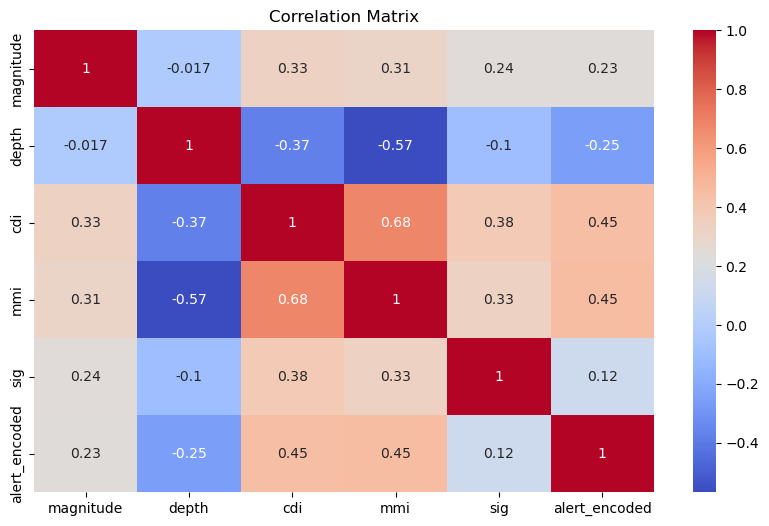

In [3]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols + ['alert_encoded']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

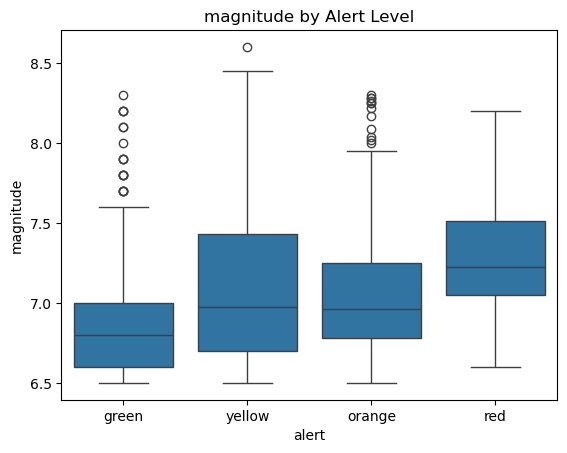

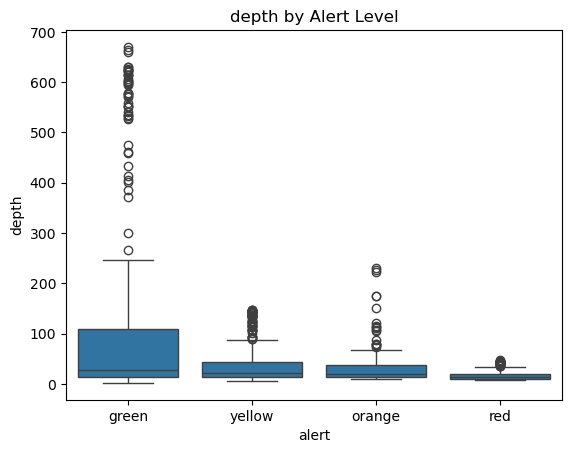

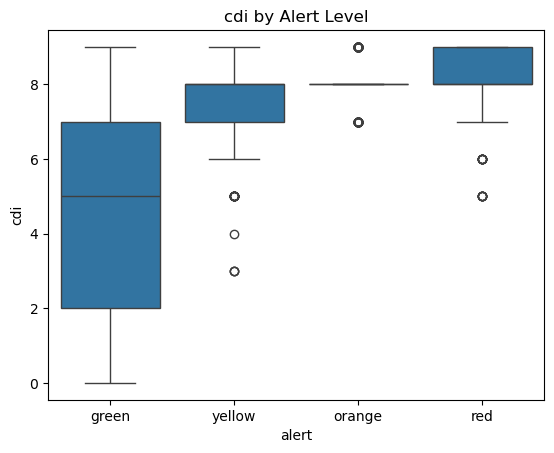

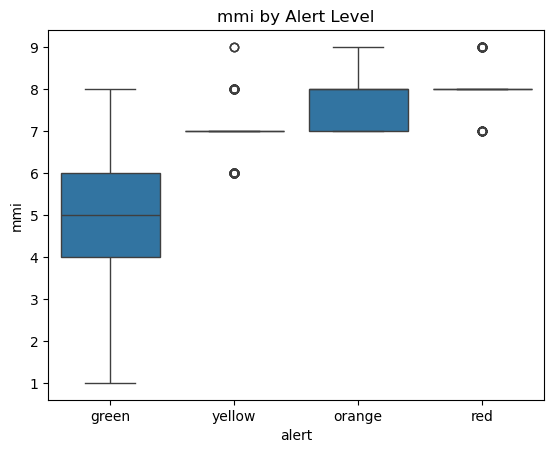

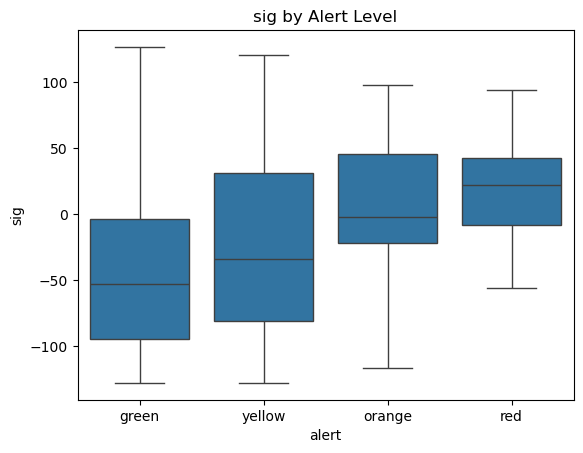

In [4]:
for col in numeric_cols:
    sns.boxplot(x='alert', y=col, data=df)
    plt.title(f'{col} by Alert Level')
    plt.show()